# ***Background***
 *Some experiments were conducted on mice to see if a treatment of Down’s syndrome works or not. Mice were divided into control and diseased (genotype), treated or untreated and whether it shows a particular behavior or not (treatment_behavior). Readings for 77 proteins were recorded for the mice, but some of the readings were discarded if they seemed unreliable (out of range). The goal is to develop a classifier, and also find out which subset of proteins is important in predicting classes.*

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

## ***Loading the dataset***

In [2]:
df=pd.read_csv('../input/mouse-train/MouseTrain.csv')
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


## ***EDA***

In [3]:
df.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DYRK1A_N            762 non-null    float64
 1   ITSN1_N             762 non-null    float64
 2   BDNF_N              762 non-null    float64
 3   NR1_N               762 non-null    float64
 4   NR2A_N              762 non-null    float64
 5   pAKT_N              762 non-null    float64
 6   pBRAF_N             762 non-null    float64
 7   pCAMKII_N           762 non-null    float64
 8   pCREB_N             762 non-null    float64
 9   pELK_N              762 non-null    float64
 10  pERK_N              762 non-null    float64
 11  pJNK_N              762 non-null    float64
 12  PKCA_N              762 non-null    float64
 13  pMEK_N              762 non-null    float64
 14  pNR1_N              762 non-null    float64
 15  pNR2A_N             762 non-null    float64
 16  pNR2B_N 

***Dropping any duplicates***

In [5]:
df.drop_duplicates(inplace=True) 

## ***strategy for dealing with missing variables***
My approach has been:
1) Check how many missing vals in cols

2) Remove cols having null values >60% of total vals

3) Replace all null vals in the rest of cols by 0

***Checking for null-values***

In [6]:
df[df.columns[df.isnull().any()]].isnull().sum()  # to check what cols have how many missing vals

ELK_N          15
MEK_N           4
Bcatenin_N     15
BAD_N         180
BCL2_N        195
pCFOS_N        60
H3AcK18_N     150
EGR1_N        180
H3MeK4_N      180
dtype: int64

***Dropping those columns with NaN>60%***

In [7]:
nan_cols = [i for i in df.columns if df[i].isnull().sum() > 0.6*762]
nan_cols                                                               

[]

In [8]:
a=df

***Replacing the NaN vals in rest of cols by 0***

In [9]:
for i in a.columns:
    if a[i].isnull().values.any():
        a[i] = a[i].replace(np.nan, 0)

In [10]:
a.shape                                   

(762, 79)

In [11]:
a.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,...,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,0.437715,0.629456,0.319844,2.311905,3.882665,0.232722,0.182514,3.513055,0.212083,1.447201,...,0.226365,0.119679,0.101921,0.122095,0.119478,0.450260,0.133337,0.139254,0.157419,1.357954
std,0.275175,0.274954,0.046536,0.342923,0.929202,0.039521,0.026548,1.268395,0.031066,0.510631,...,0.029564,0.071669,0.065041,0.014928,0.041254,0.062304,0.084749,0.085721,0.101257,0.337107
min,0.170634,0.264085,0.194160,1.414914,1.794716,0.063236,0.064043,1.369898,0.112812,0.429032,...,0.162642,0.000000,0.000000,0.067254,0.000000,0.258626,0.000000,0.000000,0.000000,0.586479
25%,0.294759,0.481011,0.290199,2.069609,3.186726,0.206446,0.165306,2.424669,0.190616,1.213118,...,0.205750,0.109146,0.000000,0.110655,0.108672,0.407385,0.105857,0.118799,0.122873,1.075929
50%,0.371534,0.569058,0.317696,2.309711,3.800418,0.229032,0.181405,3.319506,0.210077,1.347557,...,0.224439,0.142000,0.120180,0.122600,0.123521,0.450500,0.139219,0.160692,0.174622,1.351277
75%,0.486749,0.700621,0.346747,2.534053,4.471656,0.255064,0.197664,4.493452,0.233947,1.542629,...,0.241714,0.161389,0.142428,0.133617,0.141451,0.488438,0.182758,0.193745,0.218374,1.616752
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.434624,0.317066,6.947290,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.210908,0.759588,0.479763,0.360692,0.413903,2.129791


***Univariate analysis***

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


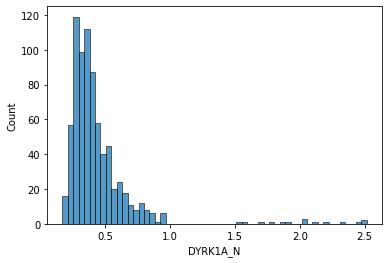

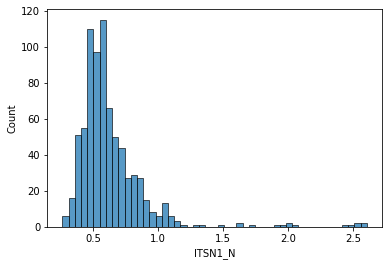

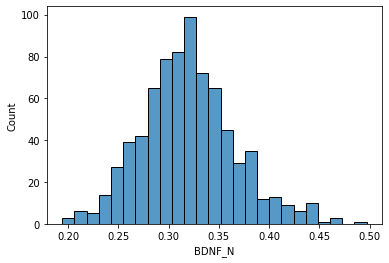

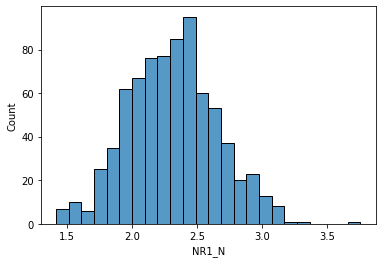

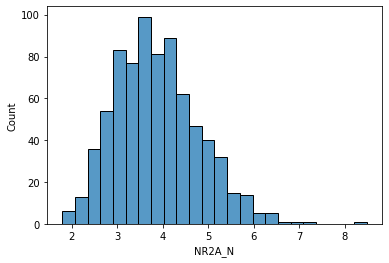

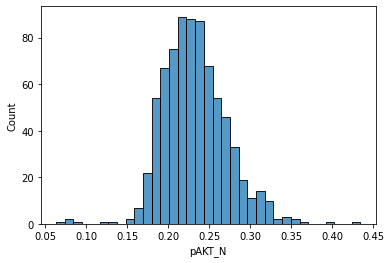

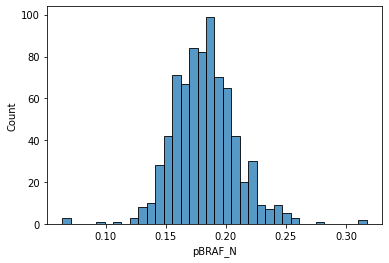

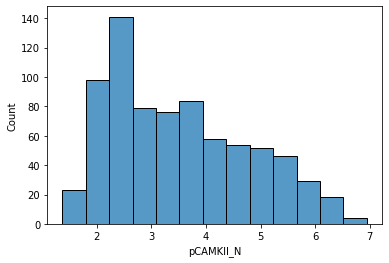

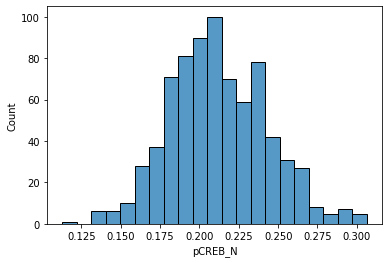

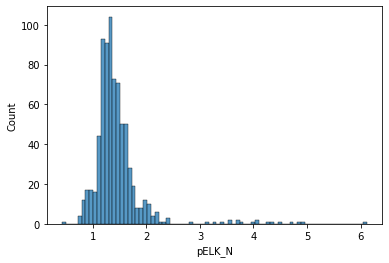

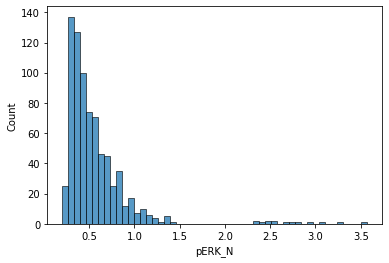

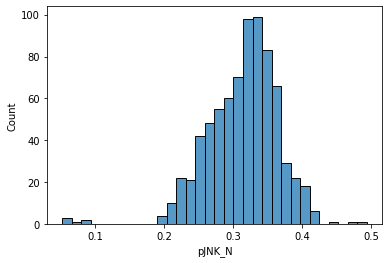

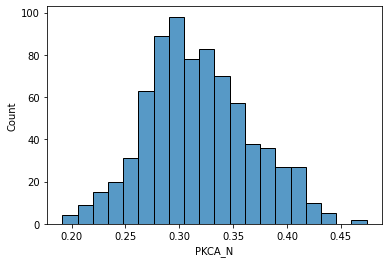

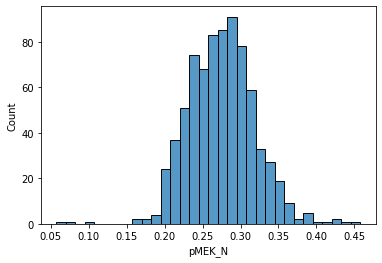

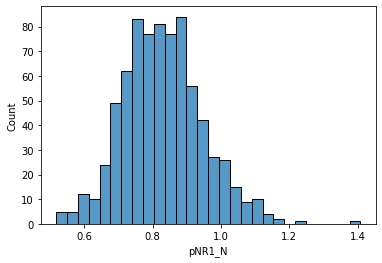

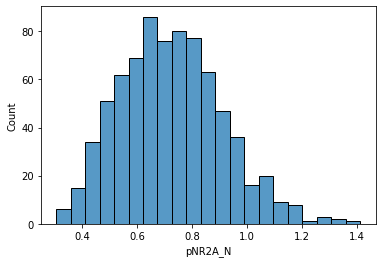

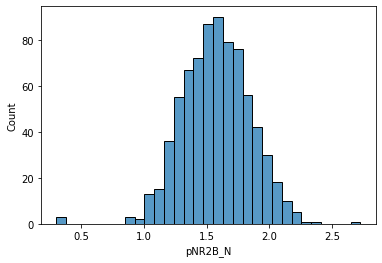

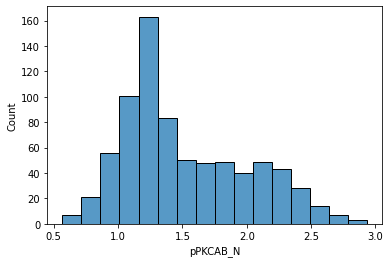

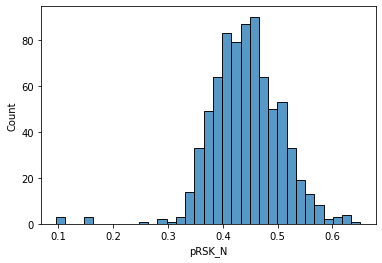

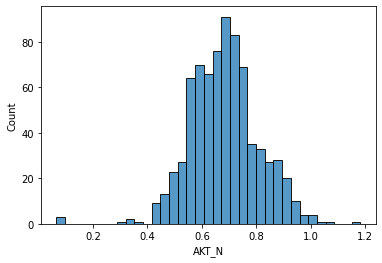

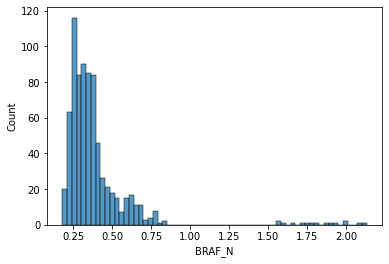

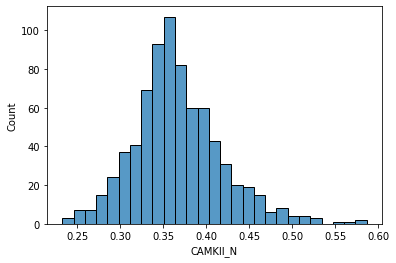

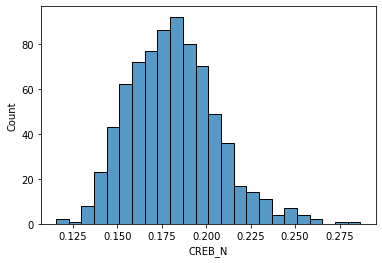

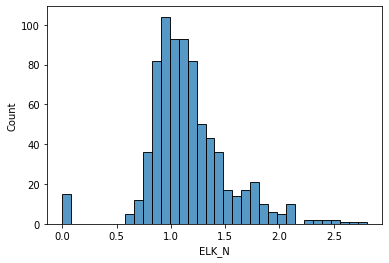

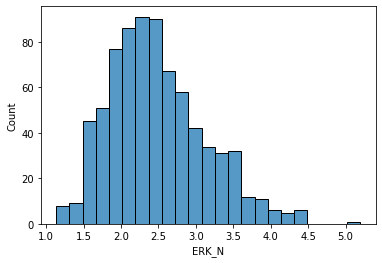

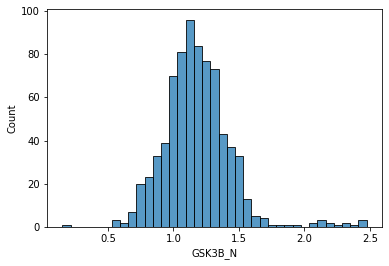

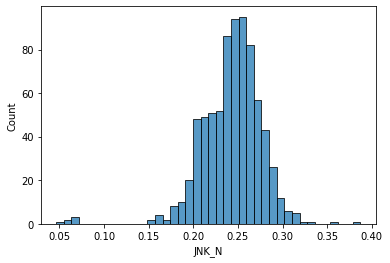

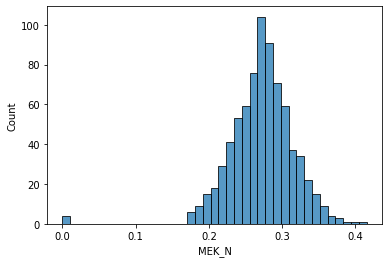

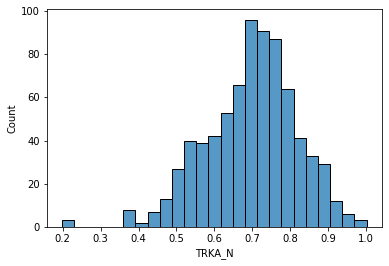

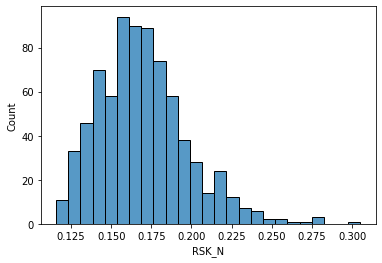

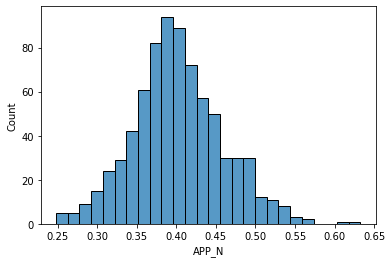

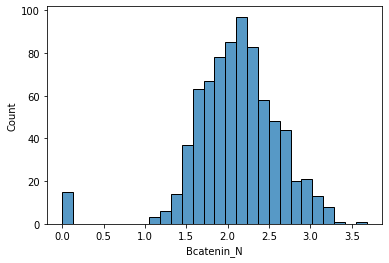

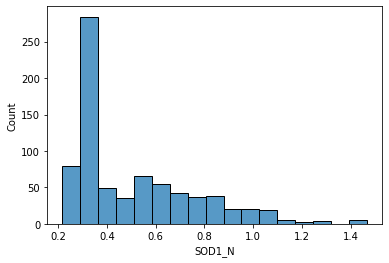

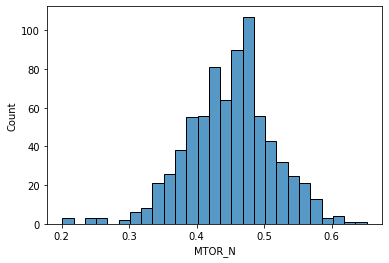

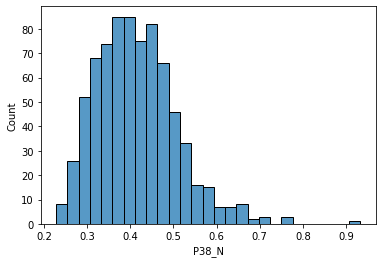

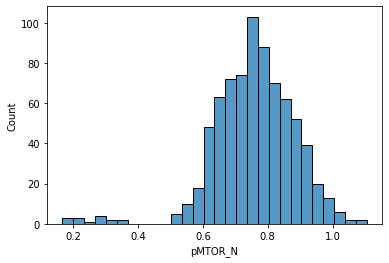

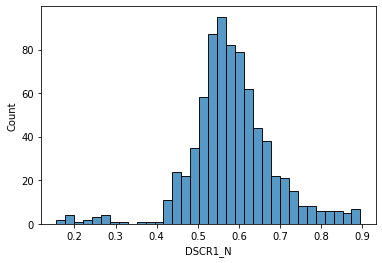

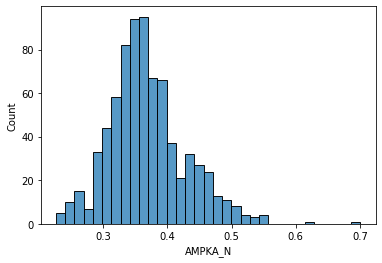

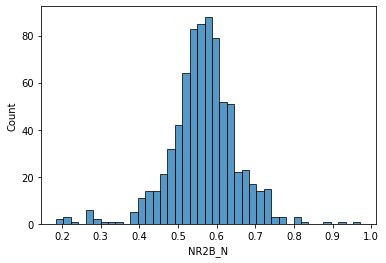

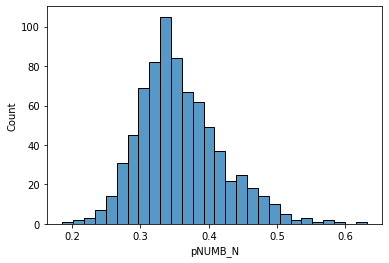

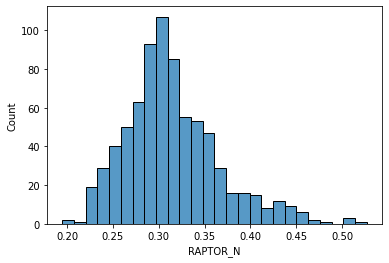

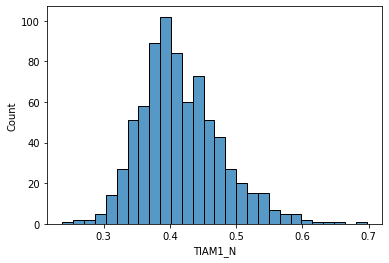

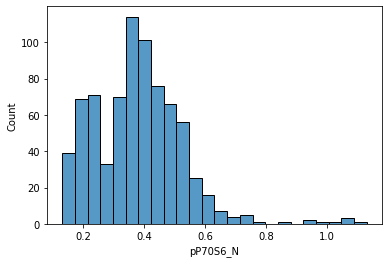

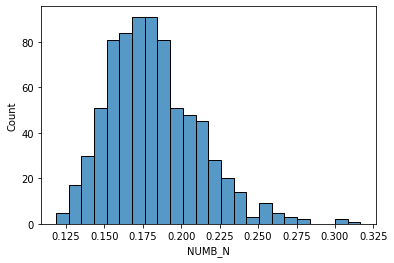

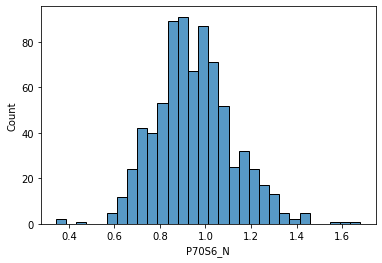

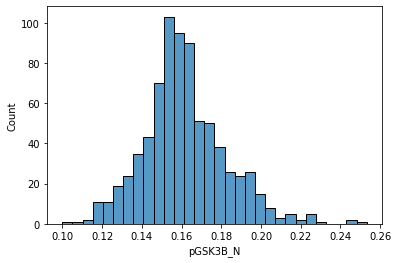

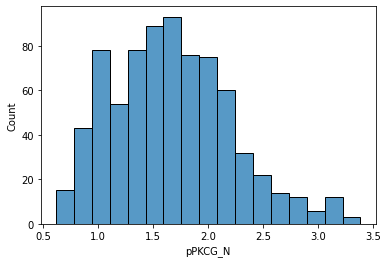

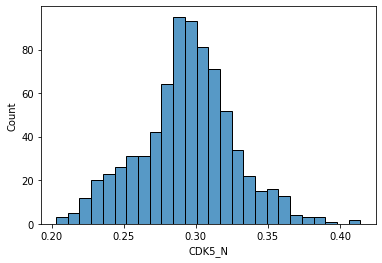

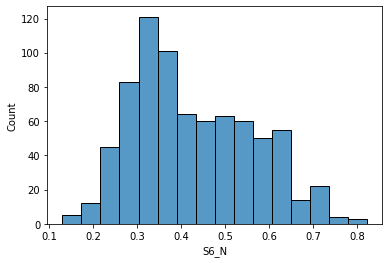

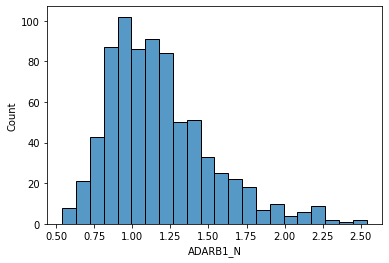

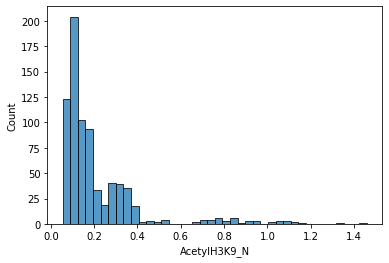

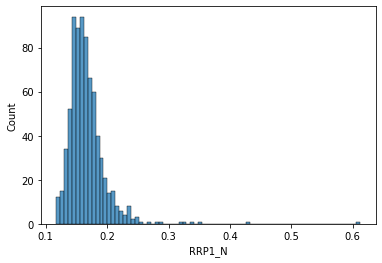

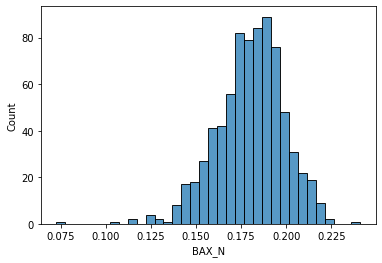

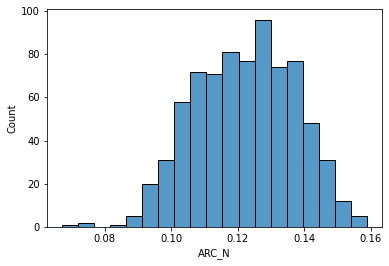

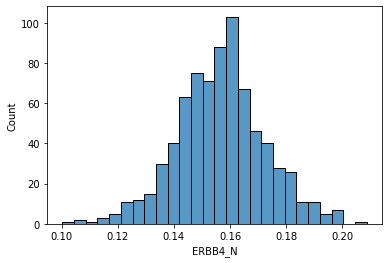

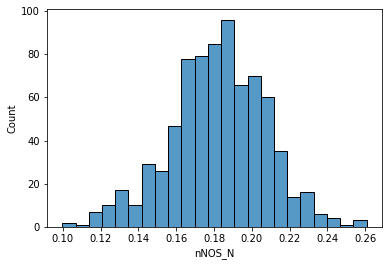

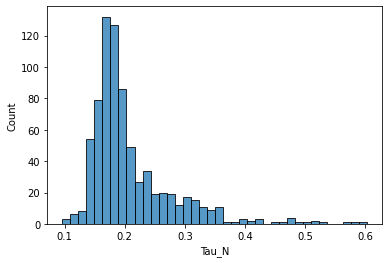

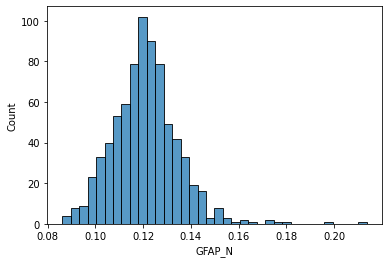

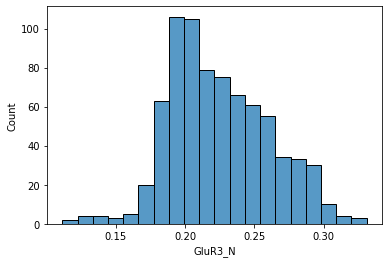

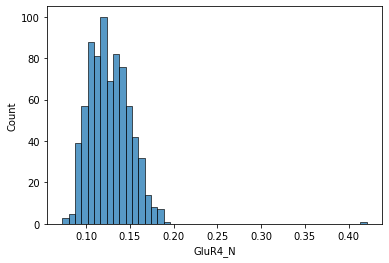

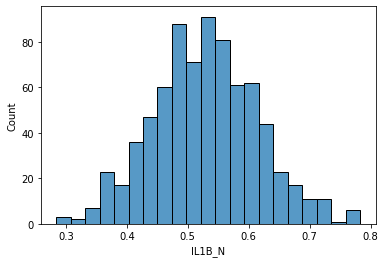

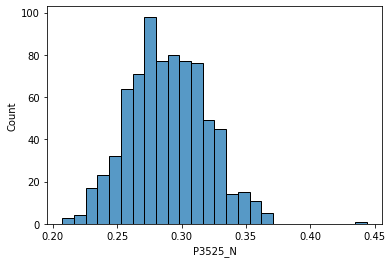

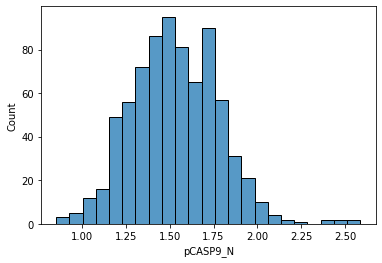

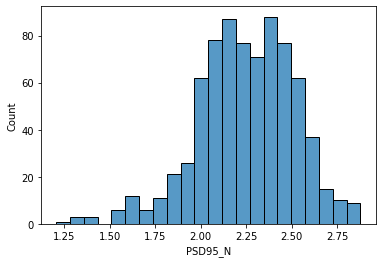

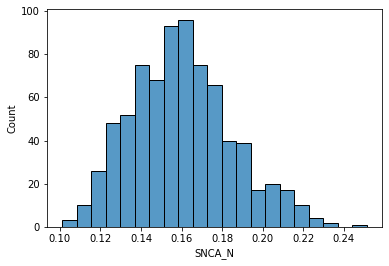

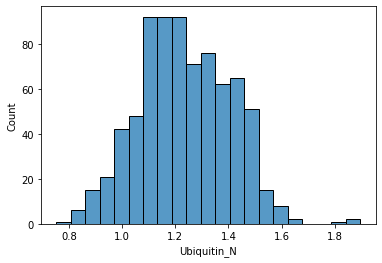

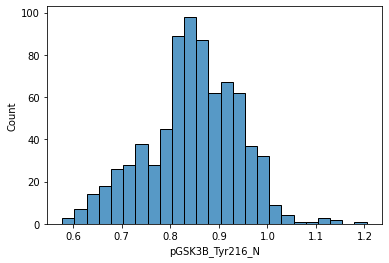

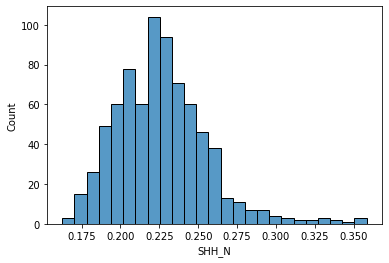

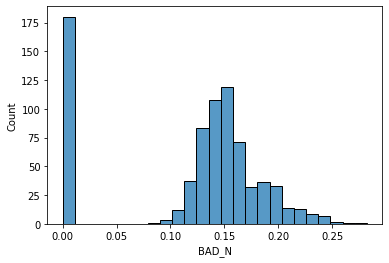

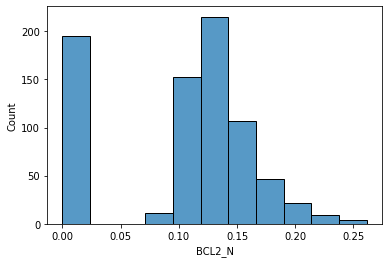

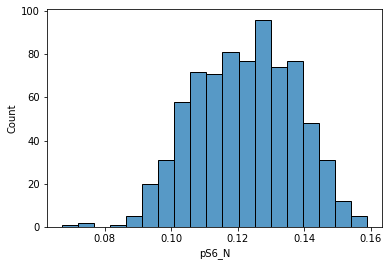

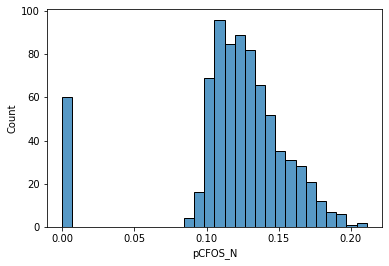

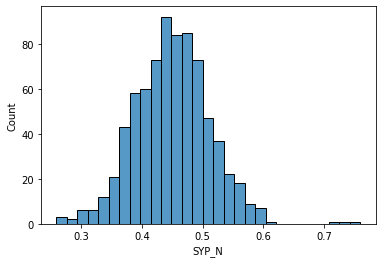

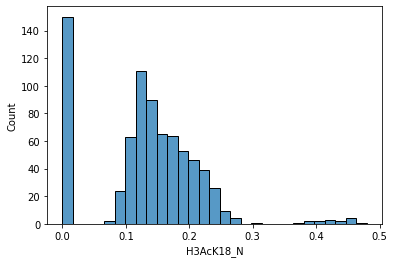

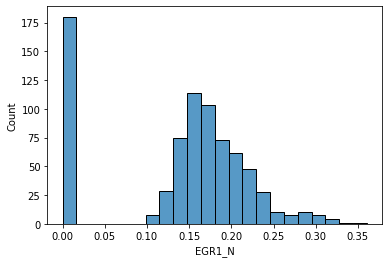

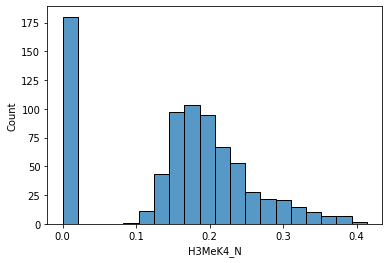

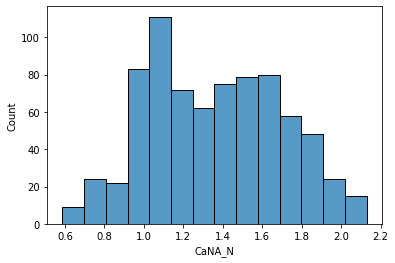

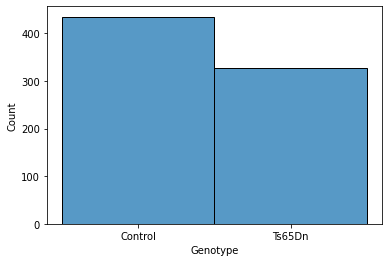

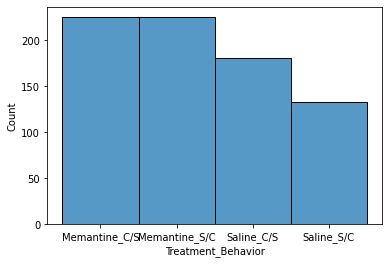

In [12]:
for i, col in enumerate(a.columns):
    plt.figure(i)
    sns.histplot(a[col])

In [13]:
for col in a.columns:                                     # checking for the no. of unique labels in each feature
  print(f"{col}: {a[col].dtype,len(a[col].unique())}")

DYRK1A_N: (dtype('float64'), 762)
ITSN1_N: (dtype('float64'), 761)
BDNF_N: (dtype('float64'), 762)
NR1_N: (dtype('float64'), 762)
NR2A_N: (dtype('float64'), 762)
pAKT_N: (dtype('float64'), 762)
pBRAF_N: (dtype('float64'), 760)
pCAMKII_N: (dtype('float64'), 762)
pCREB_N: (dtype('float64'), 762)
pELK_N: (dtype('float64'), 762)
pERK_N: (dtype('float64'), 762)
pJNK_N: (dtype('float64'), 761)
PKCA_N: (dtype('float64'), 762)
pMEK_N: (dtype('float64'), 762)
pNR1_N: (dtype('float64'), 762)
pNR2A_N: (dtype('float64'), 762)
pNR2B_N: (dtype('float64'), 762)
pPKCAB_N: (dtype('float64'), 762)
pRSK_N: (dtype('float64'), 762)
AKT_N: (dtype('float64'), 762)
BRAF_N: (dtype('float64'), 762)
CAMKII_N: (dtype('float64'), 762)
CREB_N: (dtype('float64'), 758)
ELK_N: (dtype('float64'), 748)
ERK_N: (dtype('float64'), 762)
GSK3B_N: (dtype('float64'), 762)
JNK_N: (dtype('float64'), 762)
MEK_N: (dtype('float64'), 759)
TRKA_N: (dtype('float64'), 762)
RSK_N: (dtype('float64'), 761)
APP_N: (dtype('float64'), 762)
B

***Checking the unique labels for each categorical column*** 

In [14]:
for col in a.columns:
  if a[col].dtype == object:  
    print(f"Name: {col}")         # printing the name of column  
    unique_vals = list(a[col].unique())    # fetching all unique values
    print(f"Num. of unique values: {len(unique_vals)}")
    if len(unique_vals) < 7:    # if the number of unique values is small, I will print them and see
      print(unique_vals)
    print('')
    

Name: Genotype
Num. of unique values: 2
['Control', 'Ts65Dn']

Name: Treatment_Behavior
Num. of unique values: 4
['Memantine_C/S', 'Memantine_S/C', 'Saline_C/S', 'Saline_S/C']



***counting occurence value counts of each categorical column***

In [15]:
u=a['Genotype'].value_counts(ascending=True)
u

Ts65Dn     327
Control    435
Name: Genotype, dtype: int64

In [16]:
v=a['Treatment_Behavior'].value_counts(ascending=True)
v

Saline_S/C       132
Saline_C/S       180
Memantine_C/S    225
Memantine_S/C    225
Name: Treatment_Behavior, dtype: int64

## ***Preliminary observations***
*1) df initially had 79 cols, but after removing cols with NaN> 60% we r down to 74 cols*

*2) we have-: float64(77), object(2)*

*3) All our features appear to be continous with a good spread*

*4) Classes are balanced (since all categories in both 'Genotype','Treatment_Behavior' have almost similar no. of entries)*

## lets try frequency encoding for treatment behaviour and label encoding for Genotype
### Rationale
Here we have 2 categorical columns which are both significant wrt the study. ['Genotype'] has 2 labels while [Treatment_Behavior'] has 4. 

Notice that the our model has to take into account all possibleb combination of labels from both these cols (eg (Control + Saline_S/C), (Ts65Dn + Memantine_C/S) etc).

My approach for handling this problem has been:

1) I label encoded  ['Genotype'] entries as either 0 or 1.

2) Also since freq. of each label in [Treatment_Behavior'] was different, I frequency encoded [Treatment_Behavior'] entries.

3) Finally I have added the vals in both of these as a single col ['target']. (This would generate a different sums depending on combination of labels in that entry, so that no info would be lost

*let me know of any possible loopholes*

In [17]:
# label encoding ['Genotype']
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
a['Genotype']= label_encoder.fit_transform(a['Genotype'])
a.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,Memantine_C/S
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,Memantine_C/S
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,Memantine_C/S
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.0,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,Memantine_C/S
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.0,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,Memantine_C/S


trying frequency encoding on Treatment_Behavior

In [18]:
freq_map=v.to_dict()                                     # i am trying to dict of frequency of each label in the data 
a.Treatment_Behavior=a.Treatment_Behavior.map(freq_map)  # mapping the respective freq. to the col in the original dataframe

In [19]:
a.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.0,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,225
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.0,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,225
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.0,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,225
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.0,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,225
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.0,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,225


In [20]:
a['target'] = a['Genotype'] + a['Treatment_Behavior']     # i would remove both the extra cols ['Genotype'] & ['Treatment_Behavior'] later

In [21]:
a.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior,target
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,225,225
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,225,225
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,225,225
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,225,225
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,225,225


## Feature Scaling via Standard Scaling 
**(applied only to numerical cols not categorical ones)**

In [22]:
from sklearn.preprocessing import StandardScaler  # i would scale values after dropping ["Genotype", "Treatment_Behavior","target"]
st=StandardScaler()

In [23]:
feature=a.drop(["Genotype", "Treatment_Behavior","target"], axis = 1)
feature                                                                 # features to be scaled

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.000000,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.000000,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.000000,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.000000,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.000000,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.623696,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,...,0.216128,0.156371,0.110916,0.119428,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465
758,0.401739,0.659571,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,...,0.209717,0.153224,0.110350,0.118081,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605
759,0.382182,0.586545,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,...,0.211279,0.166417,0.133664,0.116134,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514
760,0.365622,0.572209,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,...,0.197436,0.158631,0.136994,0.120649,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274


In [24]:
# transforming features + converting it to new dataframe        
data = st.fit_transform(feature)
dfa=pd.DataFrame(data)

In [25]:
# specifying our our features + target 
X=dfa
y=a['target']

## Finding highly correlated features

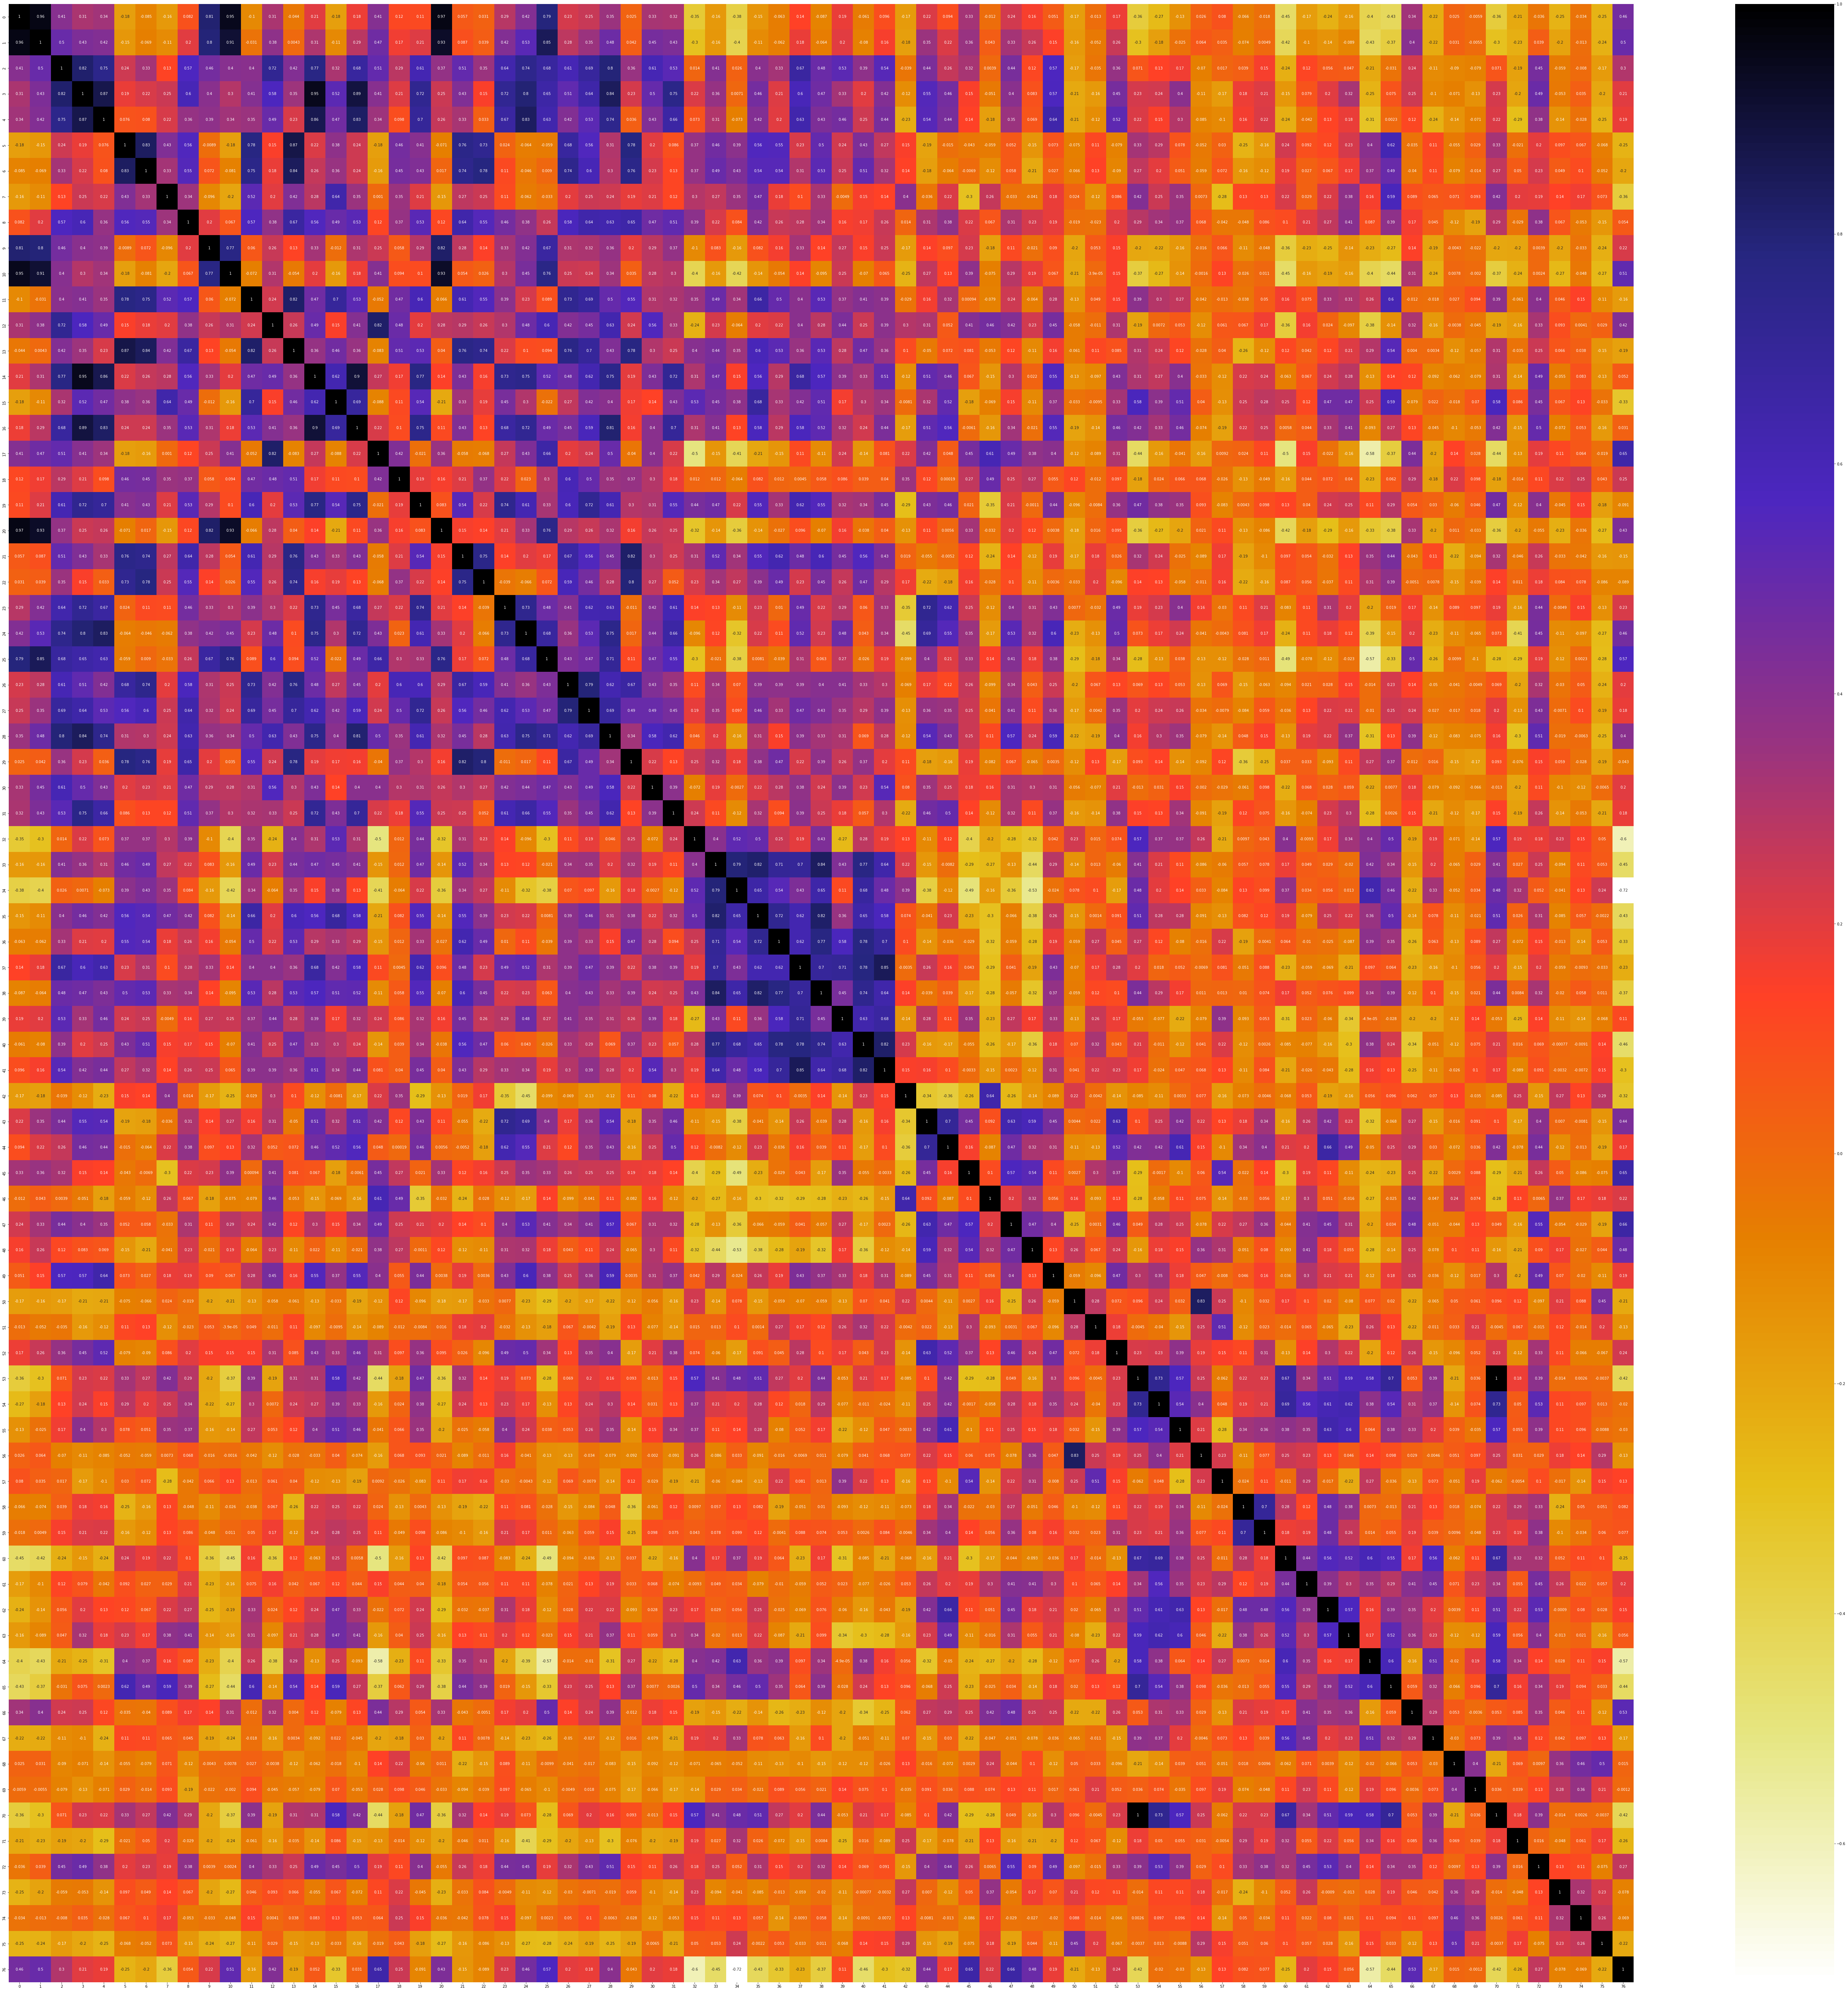

In [26]:
# Using Pearson correlation 
plt.figure(figsize=(100,100))
cor=X.corr()                                       # for a visual representation of correlation among features
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [27]:
# i am trying to find out correlated features based on a threshold criterion
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):             # function borrowed from one of my prev. projects (link attached at the end)
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [28]:
corr_features=correlation(X,0.70)          # chose a threshold of 0.70 based on my prev. projects having medical datasets
corr_features

{1,
 3,
 4,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 34,
 35,
 36,
 38,
 39,
 40,
 41,
 43,
 44,
 54,
 56,
 59,
 65,
 70}

In [29]:
X=X.drop(corr_features,axis=1)        # dropping correlated features from X
X.shape

(762, 39)

## ***Feature selection by anova***
### Rationale:
since we have numerical inputs but categorical output i will use anova for feature selection
(this way I can select the k most important features and eliminate all the others)

In [30]:
from sklearn.feature_selection import SelectKBest,f_classif

In [31]:
select=SelectKBest(f_classif,k=12)
select.fit(X,y)
select.scores_                               # i want 12 best features indicated by their respective indices
cols=select.get_support(indices=True)
cols

array([ 0,  3,  7,  8,  9, 12, 13, 15, 20, 21, 24, 38])

In [32]:
x=pd.DataFrame(X.iloc[:, [0,  3,  6,  7,  8, 11, 12, 13, 14, 19, 24, 38]])  # converting the selected features as a dataset


# ***trying K fold cross val on the models***

In [33]:
from sklearn.metrics import make_scorer,matthews_corrcoef
scoring=make_scorer(matthews_corrcoef)

#### ***Elastic net logistic regression***

In [34]:
#import model
from sklearn.linear_model import ElasticNet
#training the model
enet=ElasticNet(max_iter=3500, l1_ratio=0.6, alpha=0.1)  # i had obtained these vals of hyperparams by randomised search earlier
#                                                          so i'm using these directly

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
# 5 fold cross val
scores=cross_val_score(enet,x,y,
cv=5)
print(scores.mean())                                  # poor score

-0.9109920106414308


### ***SVM***

In [61]:
# importing the model
from sklearn.svm import SVC  
model_svm=SVC()

In [63]:
# 5 fold cross val
scores=cross_val_score(model_svm,x,y,cv=5)
print(scores.max())                                  # moderate score

0.6710526315789473


### ***random forest classifier***

In [66]:
# Importing the model
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=48,
 min_samples_split=5,
 min_samples_leaf=1,
 max_features= 'sqrt',            # i had obtained these vals of hyperparams by randomised search earlier so i'm using these directly
                                                       
 max_depth=4,
 bootstrap=True)

In [74]:
scores=cross_val_score(rf_model,x,y,cv=5)
print(scores.max())                                  # moderate score

0.6776315789473685


## ***Trying the best models on test data***

### ***loading the dataset***

In [41]:
test_df=pd.read_csv('../input/mouse-test/MouseTest.csv')
test_df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,NaN,1.649983,Control,Memantine_C/S
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,NaN,1.638988,Control,Memantine_C/S
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,NaN,1.564925,Control,Memantine_C/S
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,NaN,1.682222,Control,Memantine_C/S
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,NaN,1.660352,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740,Ts65Dn,Saline_S/C
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347,Ts65Dn,Saline_S/C
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205,Ts65Dn,Saline_S/C
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718,Ts65Dn,Saline_S/C


***Dropping any duplicates***

In [42]:
test_df.drop_duplicates(inplace=True) 

In [43]:
test_df[test_df.columns[test_df.isnull().any()]].isnull().sum()  # to check what cols have how many missing vals

BAD_N        33
BCL2_N       45
H3AcK18_N    30
EGR1_N       15
H3MeK4_N     90
dtype: int64

***Dropping those columns with NaN>60%***

In [44]:
nan_cols = [i for i in test_df.columns if test_df[i].isnull().sum() > 0.6*225]
nan_cols                                                                          #empty set

[]

***Replacing the NaN vals in cols by 0***

In [45]:
for i in test_df.columns:
    if test_df[i].isnull().values.any():
        test_df[i] = test_df[i].replace(np.nan, 0)                       # to Replace the NaN vals in cols by 0

## Feature Scaling via Standard Scaling 
**(applied only to numerical cols not categorical ones)**

In [46]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()                                  ## i would scale values after dropping ["Genotype", "Treatment_Behavior""]

In [47]:
features=test_df.drop(["Genotype", "Treatment_Behavior"], axis = 1)
features

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.627582,0.954187,0.446958,2.930717,5.915039,0.197897,0.185599,1.765115,0.232257,1.808111,...,0.211462,0.127400,0.120835,0.148773,0.120885,0.541241,0.121674,0.158103,0.000000,1.649983
1,0.651253,0.962021,0.464964,2.992689,5.975028,0.202810,0.188473,1.807824,0.259020,1.960691,...,0.222265,0.134822,0.130462,0.147660,0.128960,0.525966,0.126780,0.163405,0.000000,1.638988
2,0.644346,0.967179,0.470056,3.073847,5.927379,0.205131,0.182590,1.783552,0.258795,2.147883,...,0.227446,0.124327,0.118851,0.143169,0.129154,0.508214,0.122796,0.160293,0.000000,1.564925
3,0.568229,0.812018,0.393465,2.606780,5.808102,0.218211,0.179905,2.312324,0.209154,1.733692,...,0.207185,0.145496,0.116218,0.140063,0.127661,0.561721,0.123122,0.156108,0.000000,1.682222
4,0.587038,0.863728,0.411203,2.757975,6.006657,0.223688,0.189400,2.375283,0.218538,1.843255,...,0.213444,0.148315,0.142739,0.140775,0.121389,0.534845,0.133996,0.180373,0.000000,1.660352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.226900,0.395432,0.248694,1.460666,1.860128,0.188536,0.148977,2.178982,0.165398,0.770115,...,0.278251,0.208354,0.157209,0.122747,0.134559,0.400268,0.228568,0.233317,0.283853,1.160740
221,0.261107,0.443780,0.276658,1.674129,2.256494,0.218216,0.176008,2.475735,0.184040,0.913363,...,0.273234,0.192760,0.151454,0.119881,0.131988,0.407596,0.228843,0.226944,0.249970,1.139347
222,0.216134,0.364058,0.241693,1.330831,1.737540,0.197125,0.151597,1.919489,0.162780,0.720767,...,0.289738,0.218179,0.171437,0.118758,0.146772,0.431334,0.255633,0.257004,0.304811,1.142205
223,0.212369,0.369960,0.239036,1.346827,1.814940,0.194538,0.143454,1.908112,0.155823,0.772530,...,0.279559,0.209781,0.177576,0.121366,0.152825,0.395408,0.245564,0.255852,0.308484,1.112718


In [48]:
# transforming features + converting it to new dataframe    

datat = st.fit_transform(features)
dfat=pd.DataFrame(datat)
dfat.shape

(225, 77)

## Encoding the categorical cols using the same method as done with train data

In [49]:
# label encoding ['Genotype']
test_df['Genotype']= label_encoder.fit_transform(test_df['Genotype'])

In [50]:
v=test_df['Treatment_Behavior'].value_counts(ascending=True)

freq_map=v.to_dict()                                      # i am trying to dict of frequency of each ['Treatment_Behavior'] label in the data 
test_df.Treatment_Behavior=test_df.Treatment_Behavior.map(freq_map)   # mapping the respective freq. to the col in the original dataframe

test_df['target'] = test_df['Genotype'] + test_df['Treatment_Behavior']     # this would become y

In [51]:
# specifying our our features + target 
Xt=dfat              
yt=test_df['target']


## ***dropping correlated features***

In [52]:
# dropping correlated features
corr_features=correlation(Xt,0.70)
Xt=Xt.drop(corr_features,axis=1)       

##  ***Feature selection by anova (same method as done with train data)***

In [53]:
select=SelectKBest(f_classif,k=12)
select.fit(Xt,yt)                               # i want 12 best features indicated by their respective indices
select.scores_
cols=select.get_support(indices=True)
cols

array([ 0,  2,  3,  4,  5,  6,  7, 13, 20, 25, 26, 32])

In [54]:
xt=pd.DataFrame(Xt.iloc[:,cols])             # converting the selected features as a dataset

## ***Since SVM and random forest model got best accuracy, i am using it on test data***

### ***random forest***

In [55]:
rf_model=RandomForestClassifier(n_estimators=25,
 min_samples_split=5,
 min_samples_leaf=2,
 max_depth=4,                # i had obtained these vals of hyperparams by randomised search earlier so i'm using these directly
 bootstrap=False)

In [56]:
scores=cross_val_score(rf_model,xt,yt,cv=5)            # performs well 
print(scores.mean())

0.8088888888888889


### ***SVM***

In [57]:
model_svm=SVC()
scores=cross_val_score(model_svm,xt,yt,cv=5)
print(scores.mean())                                         # performs well 

0.8488888888888889


# Concluding remarks and thoughts

**1) i tried using mathews correlation coefficient earlier** (bcz it was more robust for multi-class classification, but since there was some issue with elastic net model and the scores obtained were very close to those obtained from default scoring, i decided to go with default).

**2) In train data both random forest & svm gave moderate scores, these gave good scores for our test data....This indicates that both of these are suitable for our Classification problem.**

**3) I have used anova for feature selection** (since we have numerical inputs but categorical output) (this way I could select the k most important features and eleiminate all the others).....[seems to work well]

**4) used frequency encoding for [treatment behaviour] and [label encoding for Genotype]** 

Rationale; 
Here we have 2 categorical columns which are both significant wrt the study. ['Genotype'] has 2 labels while [Treatment_Behavior'] has 4. Notice that the our model has to take into account all possibleb combination of labels from both these cols (eg (Control + Saline_S/C), (Ts65Dn + Memantine_C/S) etc).

My approach for handling this problem has been:

1) I label encoded  ['Genotype'] entries as either 0 or 1.

2) Also since freq. of each label in [Treatment_Behavior'] was different, I frequency encoded [Treatment_Behavior'] entries.

3) Finally I have added the vals in both of these as a single col ['target']. (This would generate a different sums depending on combination of labels in that entry, so that no info would be lost

*let me know of any possible loopholes*

#### ***CONCLUSION : both svm, random forest are found suitable for the model, but there is a possibilty of better performance by further tweaking***

